In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('D:/covid_19_data.csv')

In [31]:
df.head(10)#前十笔资料

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [32]:
df.shape#28974*8笔资料

(28974, 8)

In [35]:
df.info()#查看数据类型，Province/State存在空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28974 entries, 0 to 28973
Data columns (total 8 columns):
SNo                28974 non-null int64
ObservationDate    28974 non-null object
Province/State     14253 non-null object
Country/Region     28974 non-null object
Last Update        28974 non-null object
Confirmed          28974 non-null float64
Deaths             28974 non-null float64
Recovered          28974 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.8+ MB


In [36]:
df['Country/Region'].unique()#查看不同的国家/地区

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [37]:
len(df['Country/Region'].unique())#223个国家/地区被感染

223

In [38]:
df[df['Country/Region']=='Mainland China']#中国大陆

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
28943,28944,05/24/2020,Tianjin,Mainland China,2020-05-25 02:32:44,192.0,3.0,188.0
28944,28945,05/24/2020,Tibet,Mainland China,2020-05-25 02:32:44,1.0,0.0,1.0
28968,28969,05/24/2020,Xinjiang,Mainland China,2020-05-25 02:32:44,76.0,3.0,73.0
28971,28972,05/24/2020,Yunnan,Mainland China,2020-05-25 02:32:44,185.0,2.0,183.0


In [39]:
len(df[df['Country/Region']=='Mainland China'])#Mainland China占有3842笔资料

3842

In [40]:
df['ObservationDate'].unique()#查看不同的日期

array(['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020',
       '01/26/2020', '01/27/2020', '01/28/2020', '01/29/2020',
       '01/30/2020', '01/31/2020', '02/01/2020', '02/02/2020',
       '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020',
       '02/07/2020', '02/08/2020', '02/09/2020', '02/10/2020',
       '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020',
       '02/15/2020', '02/16/2020', '02/17/2020', '02/18/2020',
       '02/19/2020', '02/20/2020', '02/21/2020', '02/22/2020',
       '02/23/2020', '02/24/2020', '02/25/2020', '02/26/2020',
       '02/27/2020', '02/28/2020', '02/29/2020', '03/01/2020',
       '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020',
       '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020',
       '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020',
       '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020',
       '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020',
       '03/22/2020', '03/23/2020', '03/24/2020', '03/25

In [41]:
len(df['ObservationDate'].unique())#124天

124

疫情态势展示

In [42]:
df_country_region=df.groupby(['Country/Region']).max().reset_index(drop=None)#数据是累积的，所以我们需要使用 groupby() 和 max() 函数，以获得每个国家/地区报告的最大数目。

In [43]:
print(df_country_region[['Country/Region','Confirmed','Deaths','Recovered']])#目前各个国家病例的确诊、死亡、康复的总人数，同时重置索引

                     Country/Region  Confirmed  Deaths  Recovered
0                        Azerbaijan        1.0     0.0        0.0
1                   ('St. Martin',)        2.0     0.0        0.0
2                       Afghanistan    10582.0   218.0     1075.0
3                           Albania      998.0    32.0      789.0
4                           Algeria     8306.0   600.0     4784.0
..                              ...        ...     ...        ...
218                  Western Sahara        9.0     0.0        6.0
219                           Yemen      222.0    42.0       11.0
220                          Zambia      920.0     7.0      336.0
221                        Zimbabwe       56.0     4.0       25.0
222  occupied Palestinian territory       25.0     0.0        0.0

[223 rows x 4 columns]


In [44]:
print(df_country_region[df_country_region['Country/Region']=='Mainland China'])#可以看出中国大陆确诊68135人，死亡4512人，康复64435人

     Country/Region    SNo ObservationDate  Last Update  Confirmed  Deaths  \
124  Mainland China  28974      05/24/2020  4/6/20 9:37    68135.0  4512.0   

     Recovered  
124    64435.0  


当前的各个国家/地区病例确诊数据图

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

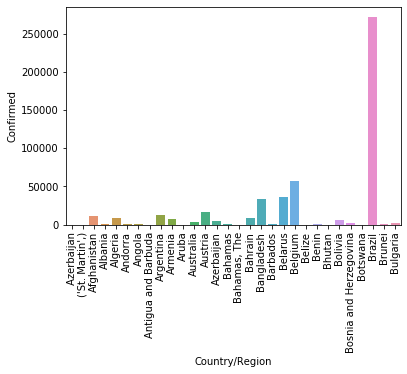

In [45]:
sns.barplot(x='Country/Region',y='Confirmed',data=df_country_region[:30])#当前的各个国家/地区病例确诊数据图
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

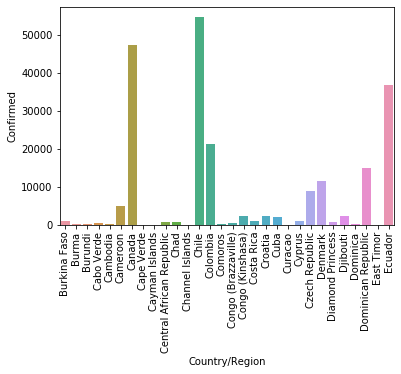

In [46]:
sns.barplot(x='Country/Region',y='Confirmed',data=df_country_region[30:60])#当前的各个国家/地区病例确诊数据图
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

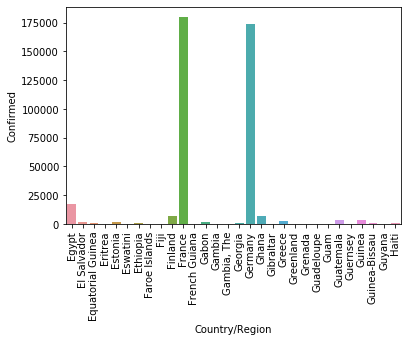

In [47]:
sns.barplot(x='Country/Region',y='Confirmed',data=df_country_region[60:90])#当前的各个国家/地区病例确诊数据图
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

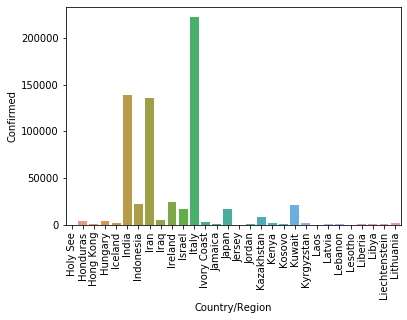

In [48]:
sns.barplot(x='Country/Region',y='Confirmed',data=df_country_region[90:120])#当前的各个国家/地区病例确诊数据图
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

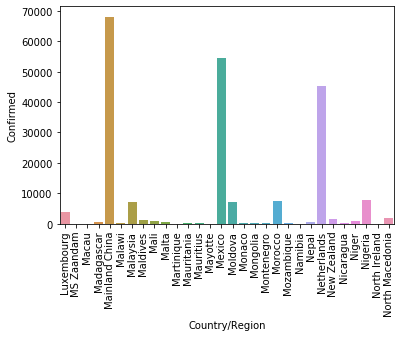

In [49]:
sns.barplot(x='Country/Region',y='Confirmed',data=df_country_region[120:150])#当前的各个国家/地区病例确诊数据图
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

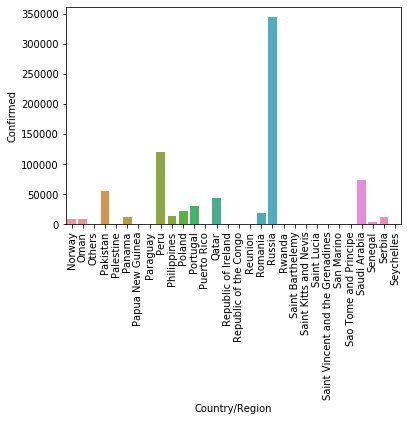

In [50]:
sns.barplot(x='Country/Region',y='Confirmed',data=df_country_region[150:180])#当前的各个国家/地区病例确诊数据图
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

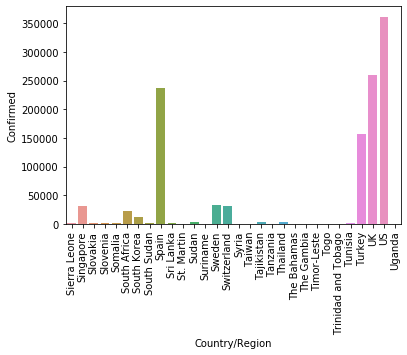

In [51]:
sns.barplot(x='Country/Region',y='Confirmed',data=df_country_region[180:210])#当前的各个国家/地区病例确诊数据图
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

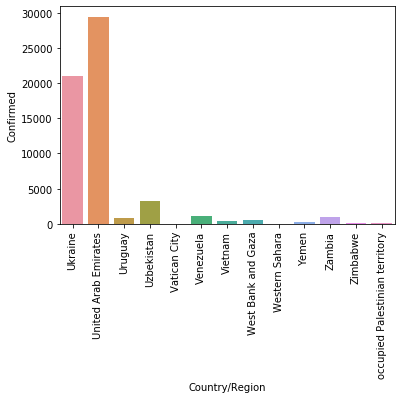

In [52]:
sns.barplot(x='Country/Region',y='Confirmed',data=df_country_region[210:223])#当前的各个国家/地区病例确诊数据图
plt.xticks(rotation=90)

首日的各个国家/地区病例确诊数据图

In [53]:
df_first_report = df[df['ObservationDate'] == df.ObservationDate.min()].groupby('Country/Region')[['Confirmed']].sum().reset_index()#首日的各个国家/地区病例确诊数据

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

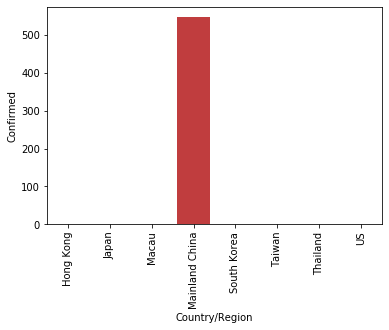

In [54]:
sns.barplot(x='Country/Region',y='Confirmed',data=df_first_report)#首日的各个国家/地区病例确诊数据图
plt.xticks(rotation=90)

全球每日确诊病例可视化

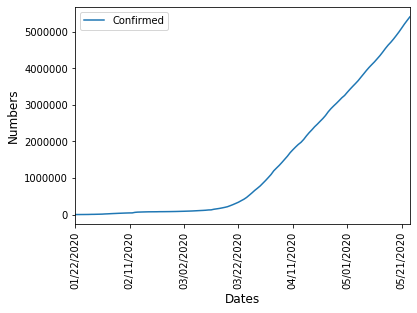

In [55]:
df.groupby('ObservationDate').sum()['Confirmed'].plot() #对每日各个国家/地区的确诊病例累加
plt.xticks(rotation=90)
plt.ylabel('Numbers',fontsize=12)
plt.xlabel('Dates',fontsize=12)
plt.legend()
plt.show()

中国大陆每日确诊病例可视化

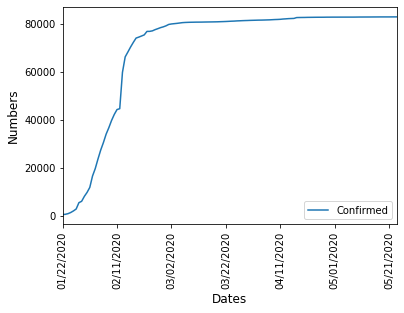

In [56]:
df[df['Country/Region'] == 'Mainland China'].groupby('ObservationDate').sum()['Confirmed'].plot()#对每日中国大陆的确诊病例累加
plt.xticks(rotation=90)
plt.ylabel('Numbers',fontsize=12)
plt.xlabel('Dates',fontsize=12)
plt.legend()
plt.show()

全球每日死亡与康复人数随时间变化曲线

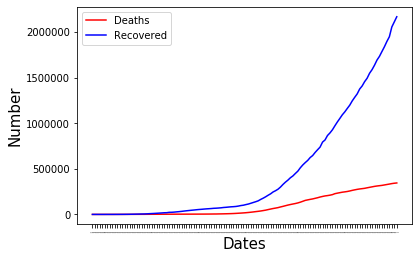

In [57]:
plt.plot('ObservationDate', 'Deaths', data=df.groupby(['ObservationDate']).sum().reset_index(drop=None), color='red')#对每日各个国家/地区的死亡数累加
plt.plot('ObservationDate', 'Recovered', data=df.groupby(['ObservationDate']).sum().reset_index(drop=None), color='blue')#对每日各个国家/地区的康复数累加
plt.ylabel('Number',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.xticks(size='small',fontsize=1)#为了美观，调整size
plt.legend()
plt.show()

全球每日确诊与康复人数随时间变化曲线

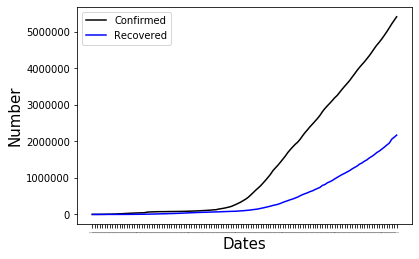

In [58]:
plt.plot('ObservationDate', 'Confirmed', data=df.groupby(['ObservationDate']).sum().reset_index(drop=None), color='black')#对每日各个国家/地区的确诊数累加
plt.plot('ObservationDate', 'Recovered', data=df.groupby(['ObservationDate']).sum().reset_index(drop=None), color='blue')#对每日各个国家/地区的康复数累加
plt.ylabel('Number',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.xticks(size='small',fontsize=1)
plt.legend()
plt.show()

全球每日确诊与死亡人数随时间变化曲线

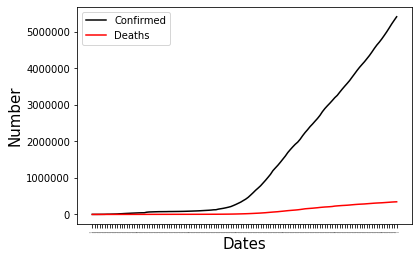

In [59]:
plt.plot('ObservationDate', 'Confirmed', data=df.groupby(['ObservationDate']).sum().reset_index(drop=None), color='black')#对每日各个国家/地区的确诊数累加
plt.plot('ObservationDate', 'Deaths', data=df.groupby(['ObservationDate']).sum().reset_index(drop=None), color='red')#对每日各个国家/地区的死亡数累加
plt.ylabel('Number',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.xticks(size='small',fontsize=1)
plt.legend()
plt.show()

In [60]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)[0:10]#按确诊人数进行排序对前十的各国家/地区进行排序

Country/Region
US         361515.0
Russia     344481.0
Brazil     271885.0
UK         259559.0
Spain      236899.0
Italy      222104.0
France     179859.0
Germany    174098.0
Turkey     156827.0
India      138536.0
Name: Confirmed, dtype: float64

In [61]:
df.groupby('Country/Region')['Deaths'].max().sort_values(ascending=False)[:10]#按死亡人数进行排序对前十的各国家/地区进行排序

Country/Region
UK             36793.0
Italy          31106.0
US             29141.0
France         28317.0
Spain          27104.0
Brazil         17983.0
Belgium         9280.0
Germany         7861.0
Iran            7417.0
Netherlands     5822.0
Name: Deaths, dtype: float64

In [62]:
df.groupby('Country/Region')['Recovered'].max().sort_values(ascending=False)[:10]#按康复人数进行排序对前十的各国家/地区进行排序

Country/Region
US                366736.0
Spain             150376.0
Brazil            149911.0
Germany           148700.0
Turkey            118694.0
Russia            113299.0
Italy             112541.0
Iran              105801.0
Mainland China     64435.0
France             62961.0
Name: Recovered, dtype: float64

In [63]:
df.groupby('Province/State')['Confirmed'].max().sort_values(ascending=False)[0:10]#按确诊人数进行排序对前十的各省/洲进行排序

Province/State
New York         361515.0
New Jersey       154154.0
Illinois         110304.0
California        94020.0
Massachusetts     92675.0
Lombardia         87110.0
Sao Paulo         82161.0
Pennsylvania      71563.0
Hubei             68135.0
Madrid            67871.0
Name: Confirmed, dtype: float64

In [64]:
df.groupby('Province/State')['Deaths'].max().sort_values(ascending=False)[:10]#按死亡人数进行排序对前十的各省/洲进行排序

Province/State
New York         29141.0
Lombardia        15840.0
New Jersey       11138.0
Madrid            8977.0
Catalonia         6701.0
Massachusetts     6372.0
Sao Paulo         6163.0
Michigan          5228.0
Pennsylvania      5136.0
Illinois          4856.0
Name: Deaths, dtype: float64

In [65]:
df.groupby('Province/State')['Recovered'].max().sort_values(ascending=False)[:10]#按康复人数进行排序对前十的各省/洲进行排序

Province/State
Recovered              366736.0
Unknown                150376.0
Hubei                   64435.0
Lombardia               45656.0
Bayern                  41740.0
Madrid                  40736.0
Nordrhein-Westfalen     33400.0
Baden-Wurttemberg       31200.0
Catalonia               26203.0
Ontario                 19477.0
Name: Recovered, dtype: float64

疫情走势预测

In [66]:
confirmed_MainlandChina_dataset = df[df['Country/Region']=='Mainland China'].groupby('ObservationDate')['Confirmed'].sum().reset_index().rename(columns={'ObservationDate': 'd', 'Confirmed': 'y'})#对中国大陆的确诊数累加

In [67]:
confirmed_MainlandChina_dataset.head(10)#前十笔资料

,d,y
0,01/22/2020,547.0
1,01/23/2020,639.0
2,01/24/2020,916.0
3,01/25/2020,1399.0
4,01/26/2020,2062.0
5,01/27/2020,2863.0
6,01/28/2020,5494.0
7,01/29/2020,6070.0
8,01/30/2020,8124.0
9,01/31/2020,9783.0


In [68]:
#.rename(columns={'ObservationDate': 'x', 'Confirmed': 'y'})

In [69]:
confirmed_MainlandChina_dataset.index

RangeIndex(start=0, stop=124, step=1)

In [70]:
#from sklearn.model_selection import train_test_split

In [71]:
#X = confirmed_MainlandChina_dataset.drop(['y'],axis=1)
#y= confirmed_MainlandChina_dataset['y']#进行feature和class的分离

In [72]:
#X_trainval, X_test, y_trainval, y_test = train_test_split(
#    X, y, random_state=0)
#X_train, X_valid, y_train, y_valid = train_test_split(
#    X_trainval, y_trainval, random_state=1)

In [73]:
#print("Size of training set: {}   size of validation set: {}   size of test set:"
      #" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

In [74]:
confirmed_MainlandChina_dataset['x']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124]#增加一列数据

In [75]:
confirmed_MainlandChina_dataset.head(10)#头十笔资料

,d,y,x
0,01/22/2020,547.0,1
1,01/23/2020,639.0,2
2,01/24/2020,916.0,3
3,01/25/2020,1399.0,4
4,01/26/2020,2062.0,5
5,01/27/2020,2863.0,6
6,01/28/2020,5494.0,7
7,01/29/2020,6070.0,8
8,01/30/2020,8124.0,9
9,01/31/2020,9783.0,10


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
data_1=confirmed_MainlandChina_dataset.drop(['d'],axis=1)#去掉d列

In [78]:
X = data_1.drop(['y'],axis=1)
y= data_1['y']#进行feature和class的分离

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

In [80]:
print("Size of training set: {}   size of test set:"
      " {}\n".format(X_train.shape[0],  X_test.shape[0]))

Size of training set: 93   size of test set: 31



k回归

In [81]:
from sklearn.neighbors import KNeighborsRegressor
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train) #训练
    training_accuracy.append(clf.score(X_train, y_train))#记录精度
    test_accuracy.append(clf.score(X_test, y_test))

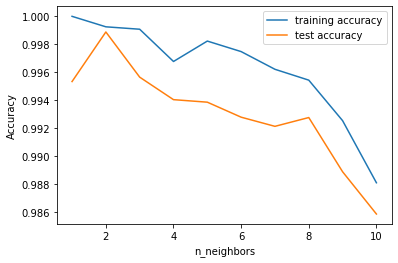

In [82]:
import matplotlib.pyplot as plt
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [83]:
#plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("n_neighbors")
#plt.legend()

k折交叉验证

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
X_trainval, X_test_1, y_trainval, y_test_1 = train_test_split(
    X, y, random_state=0)
X_train_1, X_valid, y_train_1, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=42)

In [86]:
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train_1.shape[0], X_valid.shape[0], X_test_1.shape[0]))

Size of training set: 69   size of validation set: 24   size of test set: 31



In [87]:
best_score = 0
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    scores = cross_val_score(clf, X_trainval, y_trainval, cv=5)#执行交叉验证
    score = np.mean(scores)#计算交叉验证平均精度
    if score > best_score:
            best_score = score

In [88]:
print("Best score on validation set: {:.2f}".format(best_score))#验证集最佳分数

Best score on validation set: 0.95


In [89]:
best_parameters = {'n_neighbors': n_neighbors}

In [90]:
print("Best parameters: ", best_parameters)#最佳参数

Best parameters:  {'n_neighbors': 10}


In [91]:
clf = KNeighborsRegressor(n_neighbors=10)#用最佳参数去训练+验证集
clf.fit(X_trainval, y_trainval) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [92]:
test_score = clf.score(X_test_1, y_test_1)

In [93]:
print("Test set score with best parameters: {:.2f}".format(test_score))#具有最佳参数的测试集分数

Test set score with best parameters: 0.99


In [94]:
y_pred = clf.predict(X_test_1)#预测X_test_1
print("Test set predictions:\n", y_pred)

Test set predictions:
 [11650.2 80735.4 80114.1 56832.2 81212.8 82857.6 80886.2 82624.6  8649.6
 82915.9 15264.1 81587.4 82843.8 80657.4 82371.4  8649.6 82857.6 82277.5
 56832.2 80311.8 80930.7 82624.6 82758.8 81153.4 36845.4 74850.5 82945.2
 27274.  76984.2 81785.3 64561.4]


线性回归

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [475.26563656]
lr.intercept_: 39880.88651880869


In [97]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))#训练分数
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))#测试分数

Training set score: 0.51
Test set score: 0.54


随机森林

In [98]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [99]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [100]:
print("Training set score: {:.2f}".format(regressor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(regressor.score(X_test, y_test)))

Training set score: 1.00
Test set score: 1.00


In [101]:
y_pred = regressor.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [ 8618.81 80789.18 80323.61 66440.9  81209.88 82846.65 80857.57 82741.52
  4686.92 82921.94 11713.13 81567.78 82834.77 80749.54 82462.39   972.25
 82870.79 82256.22 50921.06 80612.76 80901.31 82784.2  82813.79 81075.98
 32401.4  75606.13 82937.13 21764.83 77188.83 81699.53 71342.75]
